*This document is associated to the manuscript*

**Neutral iodotriazoles as scaffolds for stable halogen-bonded assemblies in solution**

L. Maugeri, J. Asencio-Hernández , T. Lebl, D. B. Cordes, A. Slawin, M-A. Delsuc and D. Philp, *Chem. Sci.*, 2016, [DOI: 10.1039/C6SC01974A](http://doi.org/10.1039/C6SC01974A)

# Analysis of the DOSY experiment

A series of DOSY experiments were performed on sample **9a** in C<sub>6</sub>D<sub>6</sub>, with concentrations varying from 200 mM downto 1.0 mM.
The diffusion coefficient of **9a** and of the solvent were carefully recorded for each concentration.
The observed variation of the diffusion coefficient of the solvent were interpreted as a variation of the viscosity of the sample. The diffusion coefficients of the solute were accordingly corrected against the solvent diffusion coefficient.

The variation of the corrected diffusion coefficient when fitted against a simple dimerisation model,
using the Evans et al model(1) for estimating the dimer diffusion.
The experience confirms the formation of a dimer, and the stability constant value was measured at 2.1 ± 0.4 M<sup>-1</sup>.

1) R Evans, Z Deng, A K Rogerson, A S McLachlan, J J Richards, M Nilsson, and G A Morris. 2013. “Quantitative Interpretation of Diffusion-Ordered NMR Spectra: Can We Rationalize Small Molecule Diffusion Coefficients?.” *Angewandte Chemie*  **52** (11): 3199–3202. [DOI:10.1002/anie.201207403](http://doi.org/10.1002/anie.201207403).

In [1]:
from __future__ import print_function
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy
from scipy.optimize import curve_fit
print("numpy:",np.version.version)
print("scipy:",scipy.version.version)
print("matplotlib:",matplotlib.__version__)

numpy: 1.9.3
scipy: 0.17.0
matplotlib: 1.4.3


In [2]:
# concentrations of 9a in mM
conc = np.array([
1.0, 2.6, 10, 20, 40, 60, 80, 100, 125, 150, 175, 200])/1000.0

In [3]:
# observed diffusion coefficient for 9a
mol3 = np.array([558.5,565.0,554.6,548.0,518.8,498.8,489.5,486.5,462.8,437.5,421.4,418.8] )

In [4]:
# observed diffusion coefficient for C6D6
c6d6 = np.array([1763,1782,1763,1752,1689,1632,1624,1614,1574,1551,1499,1472])

In [5]:
# the correction for viscosity variation
mol3C = mol3*c6d6[0]/c6d6

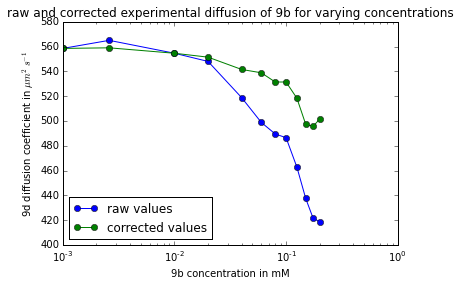

In [6]:
plt.semilogx(conc,mol3, 'o-', label='raw values')
plt.semilogx(conc,mol3C, 'o-', label='corrected values')
plt.xlabel('9a concentration in mM')
plt.ylabel('9a diffusion coefficient in $\mu m ^2 s^{-1}$')
plt.legend(loc=3)
plt.title('raw and corrected experimental diffusion of 9b for varying concentrations');

# Equilibrium Model

the equilibrium is the following
> 2M ⇋ M<sub>2</sub>

expressing the association constant and the mass conservation
> Ka = [M<sub>2</sub>] / [M]<sup>2</sup>

>[M] + 2[M<sub>2</sub>] / Mo

Solving the system, it comes
> [M] = (-1/2 + √Δ) / (2 Ka)

> with Δ = 1/4 + 2 Ka Mo

This expression is used for the fit.

In [7]:
# define M
def M(Mo, Ka):
    "compute monomer concentration"
    Delta = abs(0.25 + 2*Ka*Mo)
    return (np.sqrt(Delta)-0.5)/(2*Ka)
# and M2
def M2(Mo, Ka):
    "compute dimer concentration"
    return 0.5*(Mo - M(Mo,Ka) )


# Estimating the Diffusion coefficient of dimer

The diffusion coefficient of the dimer is estimated from the diffusion coefficient of the monomer using a variant of the method proposed by
Evans et al Angew (2013) 52 p3199-3202

In [8]:
# define diffusion
def DM2(DM):
    """
    computes diff coeff of dimer using Evans et al Angew (2013) 52 p3199-3202
    DM is the diffusion coefficient of the monomer
    """
    a = pow(2,-0.33333)    # cubic root of ratio of MW 
    k = 3*a/2 + 1/(1+a)    # MW dependent part of Evans et al equation
    return DM*a*k/2  
    
def Diff(Mo, Ka, DM):
    "compute diff coeff from Mo, Ka and DM : monomer diff coefficient"
    cM = M(Mo, Ka)
    cM2 = M2(Mo, Ka)
    dm2 = DM2(DM)
    return (DM*cM + 2*dm2*cM2)/Mo

## Simulation 
hypothetical evolution curve using Ks = 3 M<sup>-1</sup> and Dmono=560 µm<sup>2</sup>s<sup>-1</sup>

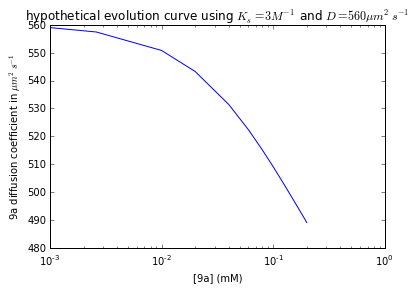

In [9]:
plt.semilogx(conc, Diff(conc, 3, 560))
plt.xlabel('[9a] (mM)')
plt.ylabel('9a diffusion coefficient in $\mu m ^2 s^{-1}$')
plt.title('hypothetical evolution curve using $K_s = 3 M^{-1}$ and $D=560 \mu m^2 s^{-1}$');

# Fitting the model to the experimental values

In [10]:
# perform the fit
popt, pcov = curve_fit(Diff, conc, mol3C, p0=[15.0, 560.0])
# and extract the error bars from covariance matrix
perr = np.sqrt(np.diag(pcov))

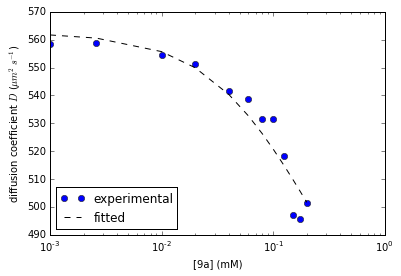

In [13]:
plt.semilogx(conc, mol3C, 'ob', label='experimental')
plt.semilogx(conc, Diff(conc, popt[0], popt[1]), 'k--', label='fitted')
plt.legend(loc=3)
plt.xlabel('[9a] (mM)')
plt.ylabel('diffusion coefficient $D$ ($\mu m ^2 s^{-1}$)')
#title('Result of the fit')
plt.show()

In [12]:
print ("Result of the fit")
print ("=================")
print ("Ka : %.1f +/- %.1f M-1\nDiff monomer : %.1f +/- %.1f um^2s-1"%(popt[0], perr[0], popt[1], perr[1]))
print ("Diff dimer estimated at : %.1f um^2s-1"%(DM2(popt[1])))

Result of the fit
Ka : 2.1 +/- 0.4 M-1
Diff monomer : 562.4 +/- 4.0 um^2s-1
Diff dimer estimated at : 390.1 um^2s-1
